In [372]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

import pickle

In [212]:
df = pd.read_csv('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [213]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [215]:
df = df[df['bedrooms']!=33]

In [216]:
df['grade'].value_counts()

7 Average        8973
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [217]:
ids = set(df['id'])

In [218]:
len(ids)

21419

In [219]:
df['year'] = df['date'].map(lambda x: x[-4:])

In [220]:
set(df['year'])

{'2014', '2015'}

In [221]:
df['month'] = df['date'].map(lambda x: x[0:2])
df['month'] = df['month'].map(lambda x: x.replace('/',''))

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     19220 non-null  object 
 9   view           21533 non-null  object 
 10  condition      21596 non-null  object 
 11  grade          21596 non-null  object 
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  object 
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   17754 non-null  float64
 16  zipcode        21596 non-null  int64  
 17  lat            21596 non-null  float64
 18  long  

In [223]:
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)


In [224]:
df['month_timeline'] = df['month'] + (df['year'] - 2014)*12

In [225]:
df['month_timeline']

0        10
1        12
2        14
3        12
4        14
         ..
21592     5
21593    14
21594     6
21595    13
21596    10
Name: month_timeline, Length: 21596, dtype: int64

In [226]:
set(df['month_timeline'])

{5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

In [227]:
import statsmodels
from statsmodels.formula.api import ols

In [228]:
df['sqft_basement'] = df['sqft_basement'].iloc[0:-2]
df['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      NaN
21596      NaN
Name: sqft_basement, Length: 21596, dtype: object

In [229]:
df['grade_value'] = df['grade'].map(lambda x: x[:2])
df['grade_value'] = df['grade_value'].astype(int)

In [230]:
set(df['grade_value'])

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [231]:
formula = 'price ~ month_timeline + sqft_living + grade_value'
model = ols(formula, df).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     8292.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:06:45   Log-Likelihood:            -2.9910e+05
No. Observations:               21596   AIC:                         5.982e+05
Df Residuals:                   21592   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6.308e+05   1.43e+04    -44.107      0.000   -6.59e+05   -6.03e+05
month_timeline  2480.1602    458.428      5.410      0.000    1581.607    3378.714
sqft_living      184.2227      2.871     64.178      0.000     178.596     189.849
grade_value      9.95e+04   2246.776     44.286      0.000    9.51e+04    1.04e+05
==============================================================================
Omnibus:                    16954.068   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1008756.854
Skew:                           3.301   Prob(JB):                         0.00
Kurtosis:                      35.825   Cond. No.                     1.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [232]:
df['waterfront'].value_counts()

NO     19074
YES      146
Name: waterfront, dtype: int64

In [233]:
df['view'].head(20)

0     NONE
1     NONE
2     NONE
3     NONE
4     NONE
5     NONE
6     NONE
7      NaN
8     NONE
9     NONE
10    NONE
11    NONE
12    NONE
13    NONE
14    NONE
15    GOOD
16    NONE
17    NONE
18    NONE
19    NONE
Name: view, dtype: object

<AxesSubplot:>

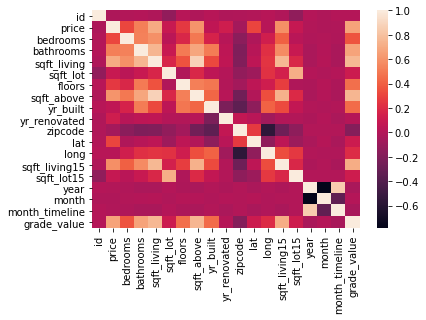

In [234]:
sns.heatmap(df.corr())

In [235]:
df['view'].value_counts()

NONE         19421
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [322]:
view_dict = {'NONE': 0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4}
df['view_number'] = df['view'].map(view_dict)

In [323]:
df['view_number'].value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view_number, dtype: int64

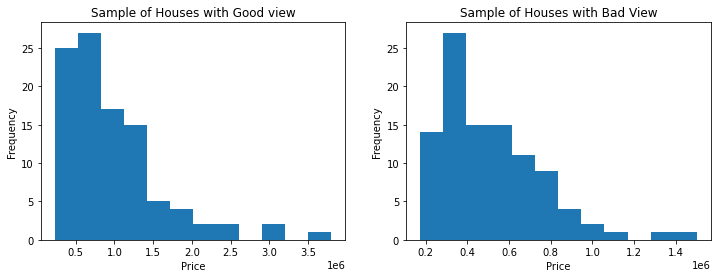

In [324]:
good_view = df.loc[df['view_number'] > 1].sample(n=100, random_state=42)
bad_view = df.loc[df['view_number'] <= 1].sample(n=100, random_state=42)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Houses with Good view')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.hist(good_view['price'], bins=12)

ax2.set_title('Sample of Houses with Bad View')
ax2.set_xlabel('Price')
ax2.set_ylabel('Frequency')
ax2.hist(bad_view['price'], bins=12)
plt.show()

In [325]:
alpha_level = 0.05
count_of_samples = good_view['price'].count() + bad_view['price'].count()
one_tailed_rejection_threshold = stats.t.ppf(1-alpha_level, df=count_of_samples-2)
print('We will reject the null if we find the t-statistic is greater than our one tailed rejection threshold of', one_tailed_rejection_threshold)

We will reject the null if we find the t-statistic is greater than our one tailed rejection threshold of 1.6525857836172075


In [326]:
if stats.ttest_ind(good_view['price'], bad_view['price']).statistic > one_tailed_rejection_threshold:
    print('Reject the Null Hypothesis')
else:
    print('Fail to Reject the Null')

Reject the Null Hypothesis


In [327]:
df['waterfront'].value_counts()

NO     19074
YES      146
Name: waterfront, dtype: int64

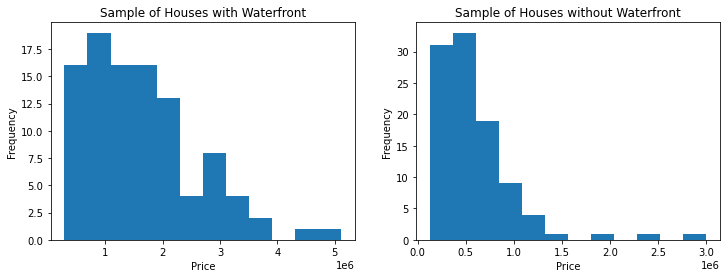

In [328]:
# Run this cell without changes to set up for the next set of questions


# Separating based on light cars and heavy cars
waterfront = df.loc[df['waterfront'] == 'YES'].sample(n=100, random_state=42)
no_waterfront = df.loc[df['waterfront'] == 'NO'].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Houses with Waterfront')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.hist(waterfront['price'], bins=12)

ax2.set_title('Sample of Houses without Waterfront')
ax2.set_xlabel('Price')
ax2.set_ylabel('Frequency')
ax2.hist(no_waterfront['price'], bins=12)
plt.show()

In [329]:
alpha_level = 0.05
count_of_samples = waterfront['price'].count() + no_waterfront['price'].count()
one_tailed_rejection_threshold = stats.t.ppf(1-alpha_level, df=count_of_samples-2)
print('We will reject the null if we find the t-statistic is greater than our one tailed rejection threshold of', one_tailed_rejection_threshold)


We will reject the null if we find the t-statistic is greater than our one tailed rejection threshold of 1.6525857836172075


In [330]:
if stats.ttest_ind(waterfront['price'], no_waterfront['price']).statistic > one_tailed_rejection_threshold:
    print('Reject the Null Hypothesis')
else:
    print('Fail to Reject the Null')

Reject the Null Hypothesis


In [331]:
df['yr_renovated'].value_counts()

0.0       17010
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [332]:
df['zipcode'].value_counts()

98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [333]:
top_10_zipcodes = df['zipcode'].value_counts().index[:10]

In [334]:
df_top_10 = df[df['zipcode'].isin(top_10_zipcodes)]

In [335]:
df_top_10

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,month_timeline,grade_value,view_number
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,98038,47.3684,-122.031,2390,7570,2015,3,15,7,0.0
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,...,98115,47.6900,-122.292,1330,6000,2014,5,5,7,0.0
17,6865200140,5/29/2014,485000.0,4,1.00,1600,4300,1.5,NO,NONE,...,98103,47.6648,-122.343,1610,4300,2014,5,5,7,0.0
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,NO,NONE,...,98115,47.6950,-122.304,1520,6235,2014,6,6,7,0.0
29,1873100390,3/2/2015,719000.0,4,2.50,2570,7173,2.0,NO,NONE,...,98052,47.7073,-122.110,2630,6026,2015,3,15,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,7570050450,9/10/2014,347500.0,3,2.50,2540,4760,2.0,NO,NONE,...,98038,47.3452,-122.022,2540,4571,2014,9,9,8,0.0
21576,1931300412,4/16/2015,475000.0,3,2.25,1190,1200,3.0,NO,NONE,...,98103,47.6542,-122.346,1180,1224,2015,4,16,8,0.0
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,NONE,...,98042,47.3749,-122.107,2530,5988,2014,10,10,8,0.0
21579,1972201967,10/31/2014,520000.0,2,2.25,1530,981,3.0,NO,NONE,...,98103,47.6533,-122.346,1530,1282,2014,10,10,8,0.0


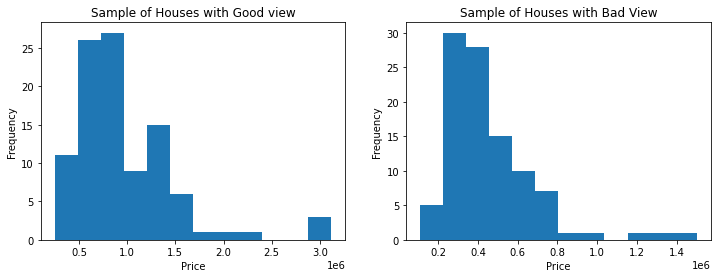

In [336]:
good_view = df_top_10.loc[df['view_number'] > 1].sample(n=100, random_state=42)
bad_view = df_top_10.loc[df['view_number'] <= 1].sample(n=100, random_state=42)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Houses with Good view')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.hist(good_view['price'], bins=12)

ax2.set_title('Sample of Houses with Bad View')
ax2.set_xlabel('Price')
ax2.set_ylabel('Frequency')
ax2.hist(bad_view['price'], bins=12)
plt.show()

In [337]:
alpha_level = 0.05
count_of_samples = waterfront['price'].count() + no_waterfront['price'].count()
one_tailed_rejection_threshold = stats.t.ppf(1-alpha_level, df=count_of_samples-2)
print('We will reject the null if we find the t-statistic is greater than our one tailed rejection threshold of', one_tailed_rejection_threshold)


We will reject the null if we find the t-statistic is greater than our one tailed rejection threshold of 1.6525857836172075


In [338]:
if stats.ttest_ind(good_view['price'], bad_view['price']).statistic > one_tailed_rejection_threshold:
    print('Reject the Null Hypothesis')
else:
    print('Fail to Reject the Null')

Reject the Null Hypothesis


In [339]:
df_top_10.groupby('bedrooms').mean().index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='bedrooms')

In [340]:
bedroom_average_prices = np.array(df_top_10.groupby('bedrooms')['price'].mean())
bedroom_average_prices_index = np.array(df_top_10.groupby('bedrooms')['price'].mean().index)

In [341]:
bedroom_average_prices_m = bedroom_average_prices/1000000

<BarContainer object of 10 artists>

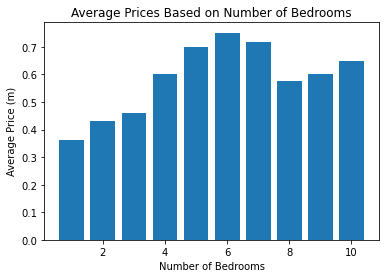

In [342]:
fig, ax = plt.subplots()

ax.set_title('Average Prices Based on Number of Bedrooms')
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Average Price (m)')
ax.bar(bedroom_average_prices_index, bedroom_average_prices_m)


In [343]:
df_top_10.groupby('zipcode')['bedrooms'].mean()

zipcode
98006    3.841365
98023    3.424850
98034    3.467890
98038    3.441426
98042    3.404022
98052    3.616725
98103    3.009983
98115    3.204117
98117    3.019892
98118    3.132150
Name: bedrooms, dtype: float64

In [344]:
df_top_10.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,month_timeline,grade_value,view_number
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,98038,47.3684,-122.031,2390,7570,2015,3,15,7,0.0
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,...,98115,47.6900,-122.292,1330,6000,2014,5,5,7,0.0
17,6865200140,5/29/2014,485000.0,4,1.00,1600,4300,1.5,NO,NONE,...,98103,47.6648,-122.343,1610,4300,2014,5,5,7,0.0
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,NO,NONE,...,98115,47.6950,-122.304,1520,6235,2014,6,6,7,0.0
29,1873100390,3/2/2015,719000.0,4,2.50,2570,7173,2.0,NO,NONE,...,98052,47.7073,-122.110,2630,6026,2015,3,15,8,0.0


In [345]:
df_top_10['yr_renovated'] = df_top_10['yr_renovated'].map(lambda x: x if (x>0) else 0)

<ipython-input-345-9abd3837cf62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['yr_renovated'] = df_top_10['yr_renovated'].map(lambda x: x if (x>0) else 0)


In [346]:
df_top_10['yr_renovated'].value_counts()

0.0       5340
2014.0      21
2005.0       8
2004.0       8
2015.0       5
2003.0       5
1984.0       5
2013.0       5
2000.0       5
1986.0       4
2010.0       4
2007.0       4
2002.0       4
1989.0       4
2009.0       4
1999.0       4
1991.0       4
1985.0       4
1993.0       4
1994.0       4
2006.0       3
1977.0       3
1968.0       3
1973.0       3
1996.0       3
1987.0       3
1975.0       3
2008.0       2
1992.0       2
1962.0       2
1998.0       2
1979.0       2
1995.0       2
2011.0       1
1990.0       1
1997.0       1
1946.0       1
1960.0       1
1981.0       1
1988.0       1
1974.0       1
1940.0       1
1958.0       1
1959.0       1
1965.0       1
1963.0       1
1976.0       1
2012.0       1
1982.0       1
1980.0       1
Name: yr_renovated, dtype: int64

In [347]:
df_top_10['yr_renovated'] = df_top_10['yr_renovated'].astype(int)

<ipython-input-347-8d541b595fd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['yr_renovated'] = df_top_10['yr_renovated'].astype(int)


In [391]:
df_top_10['age'] = df_top_10['yr_built']
df_top_10.loc[df_top_10['yr_renovated'] != 0, 'age'] = df_top_10['yr_renovated']
df_top_10['age'] = df_top_10['age'].map(lambda x: 2015-x)

<ipython-input-391-c8bf1835e12f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['age'] = df_top_10['yr_built']
/Users/ferityikar/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-391-c8bf1835e12f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [392]:
df_top_10[['yr_renovated','yr_built','age']].head(20)

,yr_renovated,yr_built,age
9,0,2003,12
11,0,1942,73
17,0,1916,99
28,0,1948,67
29,0,2005,10
32,0,1929,86
33,0,1929,86
35,2002,1930,13
36,0,1933,82
46,0,1966,49


In [350]:
yesno = {'YEs':1, 'NO':0}
df_top_10['waterfront_number'] = df_top_10['waterfront'].map(yesno)

<ipython-input-350-b2e90ef2dfb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['waterfront_number'] = df_top_10['waterfront'].map(yesno)


In [397]:
f = 'price ~ bedrooms + view_number + sqft_living + sqft_lot + grade_value + age'
model = ols(formula = f, data = df_top_10)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     1397.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:59:58   Log-Likelihood:                -74057.
No. Observations:                5479   AIC:                         1.481e+05
Df Residuals:                    5472   BIC:                         1.482e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.428e+05   2.76e+04    -23.333      0.000   -6.97e+05   -5.89e+05
bedrooms    -2.201e+04   3578.599     -6.150      0.000    -2.9e+04    -1.5e+04
view_number  8.558e+04   3832.625     22.329      0.000    7.81e+04    9.31e+04
sqft_living   150.0376      5.368     27.948      0.000     139.513     160.562
sqft_lot       -0.2346      0.094     -2.490      0.013      -0.419      -0.050
grade_value  1.053e+05   3735.767     28.200      0.000     9.8e+04    1.13e+05
age          2783.0918     92.388     30.124      0.000    2601.975    2964.209
==============================================================================
Omnibus:                     3002.861   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93057.995
Skew:                           2.044   Prob(JB):                         0.00
Kurtosis:                      22.771   Cond. No.                     3.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [405]:
df_top_10['view_number'] = df_top_10['view_number'].map(lambda x: 0 if np.isnan(x) else x)

<ipython-input-405-4085291586bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['view_number'] = df_top_10['view_number'].map(lambda x: 0 if np.isnan(x) else x)


In [406]:
df_top_10['bedrooms'].value_counts().sum()

5496

In [407]:
df_top_10['view_number'].value_counts().sum()

5496

In [413]:
y = df_top_10['price']
x = df_top_10[['bedrooms', 'view_number', 'sqft_living','sqft_lot','age','grade_value']]
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1399.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:07:59   Log-Likelihood:                -74285.
No. Observations:                5496   AIC:                         1.486e+05
Df Residuals:                    5489   BIC:                         1.486e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.449e+05   2.75e+04    -23.454      0.000   -6.99e+05   -5.91e+05
bedrooms     -2.17e+04   3572.784     -6.075      0.000   -2.87e+04   -1.47e+04
view_number  8.574e+04   3829.637     22.388      0.000    7.82e+04    9.32e+04
sqft_living   149.4844      5.358     27.898      0.000     138.980     159.989
sqft_lot       -0.2344      0.094     -2.489      0.013      -0.419      -0.050
age          2789.1055     92.238     30.238      0.000    2608.282    2969.929
grade_value  1.056e+05   3728.523     28.313      0.000    9.83e+04    1.13e+05
==============================================================================
Omnibus:                     3013.428   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93484.379
Skew:                           2.045   Prob(JB):                         0.00
Kurtosis:                      22.786   Cond. No.                     3.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [352]:
df_top_10['zipcode'].value_counts()

98103    601
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
Name: zipcode, dtype: int64

In [393]:

zipcode = 98117
f = 'price ~ bedrooms + view_number + sqft_living + sqft_lot + age '
model = ols(formula = f, data = df_top_10[df_top_10['zipcode']==zipcode])
zip_model = model.fit().summary()
zip_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     287.4
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          5.01e-143
Time:                        14:52:21   Log-Likelihood:                -6096.5
No. Observations:                 495   AIC:                         1.221e+04
Df Residuals:                     489   BIC:                         1.223e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.466e+05   1.66e+04      8.846      0.000    1.14e+05    1.79e+05
bedrooms    -8829.4576   4333.890     -2.037      0.042   -1.73e+04    -314.114
view_number      6e+04   5132.617     11.690      0.000    4.99e+04    7.01e+04
sqft_living    95.2571      4.755     20.033      0.000      85.914     104.600
sqft_lot        1.3031      0.343      3.797      0.000       0.629       1.977
age         -1124.5617    213.388     -5.270      0.000   -1543.832    -705.291
==============================================================================
Omnibus:                      376.008   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17988.748
Skew:                           2.765   Prob(JB):                         0.00
Kurtosis:                      32.010   Cond. No.                     9.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [425]:
zipcode = 98118
df_top_10_zip = df_top_10[df_top_10['zipcode']==zipcode]
y = df_top_10_zip['price']
x = df_top_10_zip[['bedrooms', 'view_number', 'sqft_living','sqft_lot','age','grade_value']]
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     211.0
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.66e-133
Time:                        15:30:20   Log-Likelihood:                -6649.7
No. Observations:                 507   AIC:                         1.331e+04
Df Residuals:                     500   BIC:                         1.334e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.896e+05   6.38e+04     -7.680      0.000   -6.15e+05   -3.64e+05
bedrooms    -2.533e+04   6925.944     -3.657      0.000   -3.89e+04   -1.17e+04
view_number  5.593e+04   7851.692      7.124      0.000    4.05e+04    7.14e+04
sqft_living   102.4889     12.621      8.120      0.000      77.692     127.286
sqft_lot       15.9098      1.294     12.295      0.000      13.367      18.452
age           761.9893    193.659      3.935      0.000     381.503    1142.475
grade_value  9.469e+04   8848.614     10.701      0.000    7.73e+04    1.12e+05
==============================================================================
Omnibus:                       15.625   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.260
Skew:                           0.111   Prob(JB):                     1.63e-07
Kurtosis:                       4.196   Cond. No.                     9.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [430]:
model.rsquared

0.7168370929585361

In [355]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     334.1
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          1.83e-138
Time:                        14:29:49   Log-Likelihood:                -6110.2
No. Observations:                 495   AIC:                         1.223e+04
Df Residuals:                     490   BIC:                         1.225e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.487e+04   1.37e+04      6.919      0.000    6.79e+04    1.22e+05
bedrooms    -1.168e+04   4415.972     -2.644      0.008   -2.04e+04   -3001.156
view_number  5.864e+04   5264.366     11.140      0.000    4.83e+04     6.9e+04
sqft_living   108.7513      4.115     26.429      0.000     100.666     116.836
sqft_lot        0.7719      0.337      2.291      0.022       0.110       1.434
==============================================================================
Omnibus:                      351.023   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14012.237
Skew:                           2.541   Prob(JB):                         0.00
Kurtosis:                      28.565   Cond. No.                     7.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [356]:
df_top_10.groupby(['bedrooms','grade'])['id'].count()

bedrooms  grade        
1         5 Fair              9
          6 Low Average      24
          7 Average          12
          8 Good              2
2         10 Very Good        5
          4 Low               3
          5 Fair             13
          6 Low Average     182
          7 Average         377
          8 Good            108
          9 Better           11
3         10 Very Good       83
          11 Excellent       14
          12 Luxury           2
          5 Fair              8
          6 Low Average     195
          7 Average        1384
          8 Good            705
          9 Better          193
4         10 Very Good       97
          11 Excellent       44
          12 Luxury          17
          13 Mansion          1
          5 Fair              2
          6 Low Average      37
          7 Average         606
          8 Good            609
          9 Better          300
5         10 Very Good       32
          11 Excellent       12
          12 Lux

In [357]:
df_top_10[df_top_10['bedrooms']>8]['zipcode']

4092     98103
15147    98006
Name: zipcode, dtype: int64

In [358]:
df_top_10.groupby(['view_number','waterfront_number'])['id'].count()

view_number  waterfront_number
0.0          0.0                  4499
1.0          0.0                    60
2.0          0.0                   159
3.0          0.0                    92
4.0          0.0                    42
Name: id, dtype: int64

In [359]:
df_top_10['view'].value_counts()

NONE         5070
AVERAGE       179
GOOD          101
EXCELLENT      66
FAIR           63
Name: view, dtype: int64

Text(0, 0.5, 'Frequency')

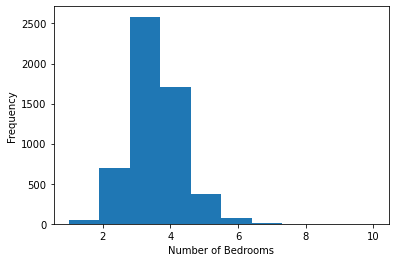

In [417]:
fig, ax = plt.subplots()

ax.hist(df_top_10['bedrooms'])
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Frequency')

In [514]:
def r2_calc(zipcode):
    df_top_10_zip = df_top_10[df_top_10['zipcode']==zipcode]
    y = df_top_10_zip['price']
    x = df_top_10_zip[['sqft_living','sqft_lot','grade_value','bedrooms','bathrooms','floors']]
    X = sm.add_constant(x)
    model = sm.OLS(y,X).fit()
    return f'{round(model.rsquared,4) * 100} %'

In [515]:
r2_calc(98103)

'63.629999999999995 %'

In [516]:
zipcodes = list(df_top_10['zipcode'].value_counts().index)

In [517]:
dict = {}
for i in range(10):
    dict[zipcodes[i]] = r2_calc(zipcodes[i])
    
dict

{98103: '63.629999999999995 %',
 98038: '77.31 %',
 98115: '68.4 %',
 98052: '67.47 %',
 98117: '69.1 %',
 98042: '77.72 %',
 98034: '58.879999999999995 %',
 98118: '68.28999999999999 %',
 98023: '69.17 %',
 98006: '68.67999999999999 %'}

In [520]:
zipcode = 98023
df_top_10_zip = df_top_10[df_top_10['zipcode']==zipcode]
y = df_top_10_zip['price']
x = df_top_10_zip[['sqft_living','sqft_lot','grade_value','bedrooms','bathrooms','floors']]
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          2.94e-122
Time:                        16:01:57   Log-Likelihood:                -6201.3
No. Observations:                 499   AIC:                         1.242e+04
Df Residuals:                     492   BIC:                         1.245e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.334e+04   3.04e+04     -1.752      0.080   -1.13e+05    6463.755
sqft_living    87.3645      7.646     11.426      0.000      72.341     102.388
sqft_lot        2.8095      0.335      8.379      0.000       2.151       3.468
grade_value  2.144e+04   4533.571      4.728      0.000    1.25e+04    3.03e+04
bedrooms    -1.507e+04   4885.884     -3.084      0.002   -2.47e+04   -5466.526
bathrooms    2014.2805   7085.790      0.284      0.776   -1.19e+04    1.59e+04
floors       1.654e+04   7212.402      2.294      0.022    2371.424    3.07e+04
==============================================================================
Omnibus:                      460.601   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25879.432
Skew:                           3.746   Prob(JB):                         0.00
Kurtosis:                      37.476   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def price_calculator()